In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_excel(r'D:\Data Analyst Boot Camp\Assignment Data\Assignment 4\data_cohort1_V2.xlsx')
df

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,0,18,5760
1,1002,1,Female,36,1,2,5,0,6,1830
2,1003,1,Female,43,1,1,12,0,9,2682
3,1004,1,Male,47,1,1,70,0,21,6846
4,1005,1,Male,41,1,2,13,0,11,3377
...,...,...,...,...,...,...,...,...,...,...
3995,996,0,Male,25,1,1,16,1,5,1420
3996,997,0,Female,51,0,1,54,1,15,4395
3997,998,0,Female,39,1,2,58,1,18,5166
3998,999,0,Male,23,1,4,57,1,18,4896


In [3]:
#1. Descriptive statistics for customer's characteristics using the appropriate tables and and bar charts.

In [4]:
#1a. Perform descriptive statistics for customer's for Demographics: Gender, Age, and Nationality.
df['Gender'].value_counts()

Male      2476
Female    1524
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

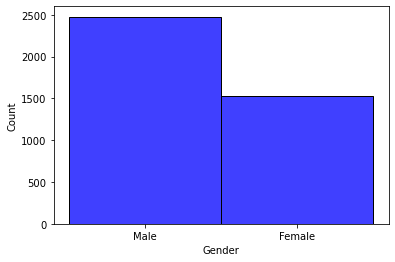

In [5]:
sns.histplot(data = df, x = "Gender", color = 'blue',bins = 20)

In [6]:
df['Age'].describe()

count    4000.000000
mean       45.364000
std         9.956771
min        18.000000
25%        39.000000
50%        45.000000
75%        52.000000
max        79.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

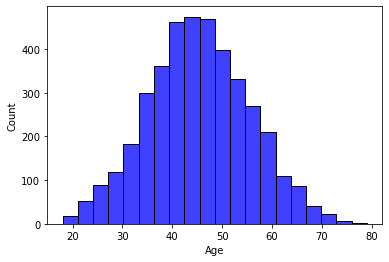

In [7]:
sns.histplot(data = df, x = "Age", color= 'blue', bins = 20)

<AxesSubplot:>

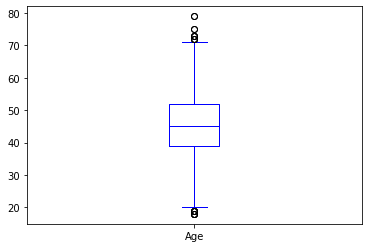

In [8]:
df.boxplot(column=['Age'], grid=False, color = 'blue')

In [9]:
df['Nationality'].describe()

count    4000.000000
mean        0.794000
std         0.404481
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Nationality, dtype: float64

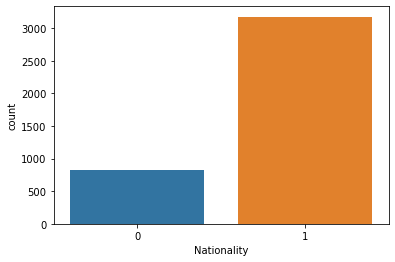

In [10]:
ax = sns.countplot(x='Nationality', data = df)

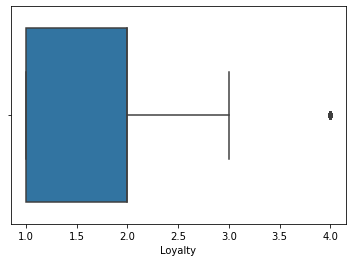

In [11]:
#1b. Perform descriptive statistics for Loyalty Membership and Tenure with the hotel chain in months.
ax = sns.boxplot(x='Loyalty', data = df)

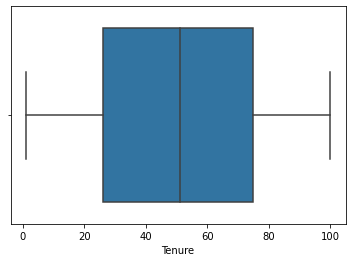

In [12]:
ax = sns.boxplot(x='Tenure', data = df)

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

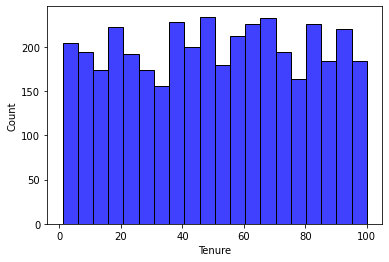

In [13]:
sns.histplot(data = df, x = "Tenure", color= 'blue', bins = 20)

In [14]:
#2. Data Summary of customer's purchase behavior

In [15]:
#2. Use appropriate tables for the summary statistics and graphics to describe customer's purchase behavior (Amount Spent and Number of Bookings.
df1 = df [['Spending','NumBookings']]
df1

,Spending,NumBookings
0,5760,18
1,1830,6
2,2682,9
3,6846,21
4,3377,11
...,...,...
3995,1420,5
3996,4395,15
3997,5166,18
3998,4896,18


In [48]:
df1.describe()

,Spending,NumBookings
count,4000.000000,4000.000000
mean,4547.248250,16.246250
std,1781.267612,6.115469
min,297.000000,1.000000
25%,3168.000000,11.000000
50%,4518.000000,16.000000
75%,5880.000000,21.000000
max,11377.000000,32.000000


In [49]:
df1.corr()

,Spending,NumBookings
Spending,1.000000,0.960651
NumBookings,0.960651,1.000000


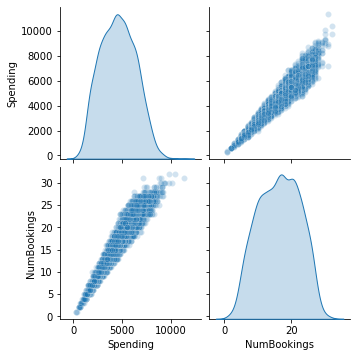

In [17]:
sns.pairplot(df1, diag_kind= 'kde', plot_kws = {'alpha':.2})

<AxesSubplot:xlabel='Spending', ylabel='NumBookings'>

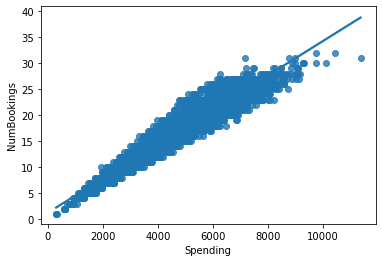

In [18]:
sns.regplot(x='Spending', y='NumBookings',data=df)


In [19]:
#3 Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers' characteristics and their purchase behavior.


In [20]:
df.pivot_table(['Spending','Loyalty'],index= 'Gender' )

,Loyalty,Spending
Gender,,
Female,1.769029,4461.074147
Male,1.775444,4600.289176


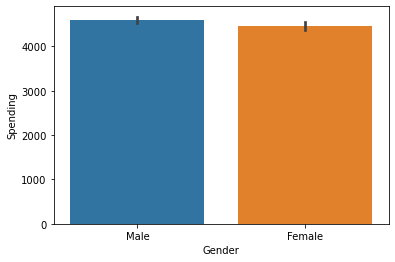

In [21]:
sns.barplot(x='Gender', y='Spending', data = df)
plt.show()

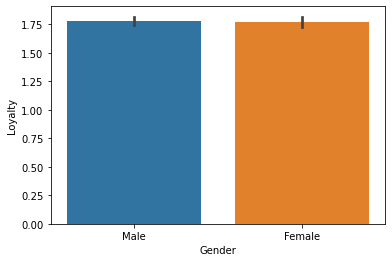

In [22]:
sns.barplot(x='Gender', y='Loyalty', data = df)
plt.show()

In [23]:
df.pivot_table(['Age','Spending'],index= 'Gender' )

,Age,Spending
Gender,,
Female,45.511811,4461.074147
Male,45.273021,4600.289176


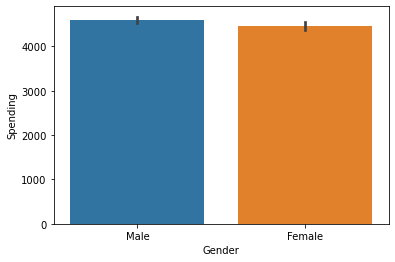

In [45]:
sns.barplot(x='Gender', y='Spending', data = df)
plt.show()

In [25]:
df3 = df [['Spending','Age']]
df3

,Spending,Age
0,5760,34
1,1830,36
2,2682,43
3,6846,47
4,3377,41
...,...,...
3995,1420,25
3996,4395,51
3997,5166,39
3998,4896,23


<AxesSubplot:xlabel='Age', ylabel='Spending'>

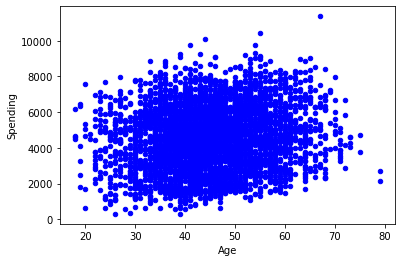

In [26]:
df3.plot.scatter(x='Age', y='Spending', c='Blue')

In [27]:
#Examine the relationship between the customers' characteristics and their purchase behavior.

In [28]:
df4 = df [['CustomerID','Adopt','Age','Nationality','Loyalty','Post','NumBookings','Spending']]
df4

,CustomerID,Adopt,Age,Nationality,Loyalty,Post,NumBookings,Spending
0,1001,1,34,1,2,0,18,5760
1,1002,1,36,1,2,0,6,1830
2,1003,1,43,1,1,0,9,2682
3,1004,1,47,1,1,0,21,6846
4,1005,1,41,1,2,0,11,3377
...,...,...,...,...,...,...,...,...
3995,996,0,25,1,1,1,5,1420
3996,997,0,51,0,1,1,15,4395
3997,998,0,39,1,2,1,18,5166
3998,999,0,23,1,4,1,18,4896


In [29]:
#Generate a table of the correlations of all the numerical variables of the data set.
df4.corr()

,CustomerID,Adopt,Age,Nationality,Loyalty,Post,NumBookings,Spending
CustomerID,1.000000e+00,8.660255e-01,-4.260377e-02,-1.708152e-02,1.792886e-02,3.493452e-16,-0.023717,0.137578
Adopt,8.660255e-01,1.000000e+00,-5.022336e-02,-7.417839e-03,1.249943e-02,-4.494183e-16,-0.039863,0.145252
Age,-4.260377e-02,-5.022336e-02,1.000000e+00,1.589144e-02,-1.094271e-02,-1.089773e-15,0.149759,0.142395
Nationality,-1.708152e-02,-7.417839e-03,1.589144e-02,1.000000e+00,-7.361306e-04,-5.967102e-16,0.031734,0.028043
Loyalty,1.792886e-02,1.249943e-02,-1.094271e-02,-7.361306e-04,1.000000e+00,-5.247456e-16,0.187719,0.185180
Post,3.493452e-16,-4.494183e-16,-1.089773e-15,-5.967102e-16,-5.247456e-16,1.000000e+00,-0.172330,-0.176905
NumBookings,-2.371725e-02,-3.986292e-02,1.497593e-01,3.173407e-02,1.877186e-01,-1.723305e-01,1.000000,0.960651
Spending,1.375778e-01,1.452519e-01,1.423946e-01,2.804337e-02,1.851802e-01,-1.769047e-01,0.960651,1.000000


In [30]:
#Determine whether there is a statistically significant difference between the spending of men and women.(Please use the appropriate hypothesis test.)
data = df['Spending']
 
#calculate the sample parameters
confidenceLevel = 0.95 # 95% CI given
degrees_freedom = len(data) - 1 # degree of freedom = sample size - 1
sampleMean = np.mean(data) # sample mean
sampleStandardError = st.sem(data) # sample standard error
 
#create 95% confidence interval for the population mean
confidenceInterval = st.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)
 
#print the 95% confidence interval for the population mean
print('The 95% confidence interval for the population mean:', confidenceInterval)

#There is not a significant difference between the mean of the tow populations.

The 95% confidence interval for the population mean: (4492.030496654635, 4602.466003345365)


<AxesSubplot:xlabel='Age', ylabel='Spending'>

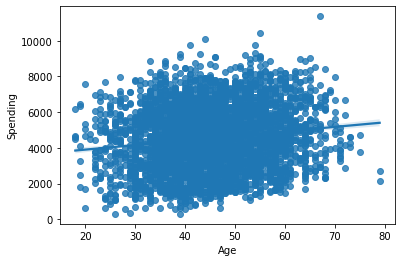

In [31]:
#Construct a scatterplot of Spending(y-axis) and Age(x-axis) and add the fitted regression line to it.
sns.regplot(x='Age', y='Spending',data=df)

#The equation for the simple regression line is Y=b+b1(x)
#Age is not a significant predictor of spending. 
#The majority of spending occurs between the ages of 30-60.

In [32]:
#Run a Linear Regression for Spending(the dependent variable) on Loyalty(the independent variable).Please explain your findings.
df['Spending'] = df['Spending']
mod = smf.ols('Spending~Loyalty', data=df)
res = mod.fit()
print(res.summary())

#The p-value is very low (below 0.5), whigh means it is very significant. The R-squared is also low which means that the independent variable is not explaining a lot of the dependent variable. I may want to add other variables.

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     142.0
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           3.45e-32
Time:                        19:59:34   Log-Likelihood:                -35546.
No. Observations:                4000   AIC:                         7.110e+04
Df Residuals:                    3998   BIC:                         7.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3882.7779     62.260     62.364      0.0

In [33]:
#Determine the app's effectiveness on the customer's spending. Construct a pivot table broken up by Adaopt and Post.
#What is the difference between the treatment and control groups in the Post=1 period?
df.pivot_table(['Post','Adopt'],index= 'Spending' )

,Adopt,Post
Spending,,
297,1.0,1.0
299,1.0,1.0
337,1.0,1.0
572,1.0,1.0
578,1.0,1.0
...,...,...
9750,1.0,0.0
9760,1.0,0.0
10110,1.0,0.0


In [34]:
#Run a regression with Spending as the dependent variable and Adpot as the independent variable.
df['Spending'] = df['Spending']
mod = smf.ols('Spending~Post', data=df)
res = mod.fit()
print(res.summary())
#Post is not statistically significant. R-square is low and the P-value is 0.

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.76e-29
Time:                        19:59:35   Log-Likelihood:                -35552.
No. Observations:                4000   AIC:                         7.111e+04
Df Residuals:                    3998   BIC:                         7.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4862.3235     39.207    124.017      0.0

In [35]:
df['Spending'] = df['Spending']
mod = smf.ols('Spending~Post+Gender+Age+Nationality', data=df)
res = mod.fit()
print(res.summary())
#When additional variables are added there is an increase in R-squared to.05. The P-value remains low when additional vairables are added to the regression.

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     56.77
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.19e-46
Time:                        19:59:35   Log-Likelihood:                -35505.
No. Observations:                4000   AIC:                         7.102e+04
Df Residuals:                    3995   BIC:                         7.105e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3528.1728    145.172     24.

In [36]:
df['Spending'] = df['Spending']
mod = smf.ols('Spending~Adopt', data=df)
res = mod.fit()
print(res.summary())
#The R-squared is below .05 and the P-value is 0. 

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     86.17
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.64e-20
Time:                        19:59:35   Log-Likelihood:                -35573.
No. Observations:                4000   AIC:                         7.115e+04
Df Residuals:                    3998   BIC:                         7.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4288.5480     39.413    108.811      0.0

In [37]:
df['Spending'] = df['Spending']
mod = smf.ols('Spending~Adopt+Gender+Nationality+Loyalty', data=df)
res = mod.fit()
print(res.summary())
#With additional variables there is little difference. Adopt has the highest p-value at .06 in the Natioanlity category.

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     60.13
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.22e-49
Time:                        19:59:35   Log-Likelihood:                -35499.
No. Observations:                4000   AIC:                         7.101e+04
Df Residuals:                    3995   BIC:                         7.104e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3455.8727     92.458     37.

In [38]:
#6. Constuct a new dataframe where each customer, you have a new variable, with is the difference in spending between Post = 1 and Post = 0.
DiffInSpending= df['Post']-df['Post']
print(DiffInSpending)


0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Name: Post, Length: 4000, dtype: int64


In [39]:
df6 = df.assign(DiffInSpending=0)
df6

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending,DiffInSpending
0,1001,1,Male,34,1,2,57,0,18,5760,0
1,1002,1,Female,36,1,2,5,0,6,1830,0
2,1003,1,Female,43,1,1,12,0,9,2682,0
3,1004,1,Male,47,1,1,70,0,21,6846,0
4,1005,1,Male,41,1,2,13,0,11,3377,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,996,0,Male,25,1,1,16,1,5,1420,0
3996,997,0,Female,51,0,1,54,1,15,4395,0
3997,998,0,Female,39,1,2,58,1,18,5166,0
3998,999,0,Male,23,1,4,57,1,18,4896,0


In [40]:
#Run a regression for this difference in spending on Adopt. What is the coefficient for Adopt?
df6['DiffInSpending'] = df6['DiffInSpending']
mod = smf.ols('Adopt~DiffInSpending', data=df6)
res = mod.fit()
print(res.summary())
#The coefficient is 0.5.

                            OLS Regression Results                            
Dep. Variable:                  Adopt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                nan
Time:                        19:59:35   Log-Likelihood:                -2903.2
No. Observations:                4000   AIC:                             5808.
Df Residuals:                    3999   BIC:                             5815.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5000      0.008     63.

C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [41]:
#Using the the pivot table from Question 5, compute the average diffence between Adopt=1 and Adopt=0 in both Post =1 and Post=0 period. Call it Difference1 and Difference0.
table = df.pivot_table(['Post','Adopt'],index= 'Spending' )
table

,Adopt,Post
Spending,,
297,1.0,1.0
299,1.0,1.0
337,1.0,1.0
572,1.0,1.0
578,1.0,1.0
...,...,...
9750,1.0,0.0
9760,1.0,0.0
10110,1.0,0.0


In [58]:
table.corr()

,Adopt,Post
Adopt,1.000000,0.001662
Post,0.001662,1.000000


In [56]:
#Difference1
Difference1 = table['Adopt']-table['Adopt']
Difference1.mean()

0.0

In [55]:
#Difference0
Difference0 = table['Post']-table['Post']
Difference0.mean()

0.0

In [57]:
#Compute the difference between the two Differences. 
BeforeAfterDesign = Difference1-Difference0
BeforeAfterDesign.mean()

#The Coefficient in point 1 is 0. The diffence is 0 also.

0.0